In [135]:
import pandas as pd
import seaborn as sns
import numpy as np
import klib

In [136]:
import pandas as pd
import seaborn as sns
import numpy as np
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score
import klib
import plotly.express as px
import matplotlib.pyplot as plt
import statsmodels.api as sm
from scipy.signal.signaltools import _centered
from sklearn import neighbors
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error 
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
import sklearn
from math import sqrt
import matplotlib.pyplot as plt
%matplotlib inline

In [137]:
!pip install klib

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [138]:
#conda install tensorflow

In [139]:
pd.set_option('display.max_rows', None)

In [140]:
data= pd.read_csv('/measurements.csv')

In [141]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [142]:
data

,distance,consume,speed,temp_inside,temp_outside,specials,gas_type,AC,rain,sun,refill liters,refill gas
0,28,5,26,"21,5",12,NaN,E10,0,0,0,45,E10
1,12,"4,2",30,"21,5",13,NaN,E10,0,0,0,NaN,NaN
2,"11,2","5,5",38,"21,5",15,NaN,E10,0,0,0,NaN,NaN
3,"12,9","3,9",36,"21,5",14,NaN,E10,0,0,0,NaN,NaN
4,"18,5","4,5",46,"21,5",15,NaN,E10,0,0,0,NaN,NaN
5,"8,3","6,4",50,"21,5",10,NaN,E10,0,0,0,NaN,NaN
6,"7,8","4,4",43,"21,5",11,NaN,E10,0,0,0,NaN,NaN
7,"12,3",5,40,"21,5",6,NaN,E10,0,0,0,NaN,NaN
8,"4,9","6,4",26,"21,5",4,NaN,E10,0,0,0,NaN,NaN
9,"11,9","5,3",30,"21,5",9,NaN,E10,0,0,0,NaN,NaN


# expoloring Data

In [143]:
data.head()

,distance,consume,speed,temp_inside,temp_outside,specials,gas_type,AC,rain,sun,refill liters,refill gas
0,28,5,26,"21,5",12,NaN,E10,0,0,0,45,E10
1,12,"4,2",30,"21,5",13,NaN,E10,0,0,0,NaN,NaN
2,"11,2","5,5",38,"21,5",15,NaN,E10,0,0,0,NaN,NaN
3,"12,9","3,9",36,"21,5",14,NaN,E10,0,0,0,NaN,NaN
4,"18,5","4,5",46,"21,5",15,NaN,E10,0,0,0,NaN,NaN


In [144]:
data.tail()

,distance,consume,speed,temp_inside,temp_outside,specials,gas_type,AC,rain,sun,refill liters,refill gas
383,16,"3,7",39,"24,5",18,NaN,SP98,0,0,0,NaN,NaN
384,"16,1","4,3",38,25,31,AC,SP98,1,0,0,NaN,NaN
385,16,"3,8",45,25,19,NaN,SP98,0,0,0,NaN,NaN
386,"15,4","4,6",42,25,31,AC,SP98,1,0,0,NaN,NaN
387,"14,7",5,25,25,30,AC,SP98,1,0,0,NaN,NaN


In [145]:
data.shape

(388, 12)

In [146]:
pd.set_option('display.max_rows', 10)

In [147]:
data.dtypes

distance         object
consume          object
speed             int64
temp_inside      object
temp_outside      int64
                  ...  
AC                int64
rain              int64
sun               int64
refill liters    object
refill gas       object
Length: 12, dtype: object

In [148]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 388 entries, 0 to 387
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   distance       388 non-null    object
 1   consume        388 non-null    object
 2   speed          388 non-null    int64 
 3   temp_inside    376 non-null    object
 4   temp_outside   388 non-null    int64 
 5   specials       93 non-null     object
 6   gas_type       388 non-null    object
 7   AC             388 non-null    int64 
 8   rain           388 non-null    int64 
 9   sun            388 non-null    int64 
 10  refill liters  13 non-null     object
 11  refill gas     13 non-null     object
dtypes: int64(5), object(7)
memory usage: 36.5+ KB


In [149]:
data.value_counts()

distance  consume  speed  temp_inside  temp_outside  specials            gas_type  AC  rain  sun  refill liters  refill gas
16,1      5,4      24     21,5         7             rain                E10       0   1     0    38             E10           1
25,7      4,9      50     22           10            rain                SP98      0   1     0    41             SP98          1
43,7      4,7      44     22           9             half rain half sun  SP98      0   1     0    10             SP98          1
dtype: int64

# cleaning the data

In [150]:
data.rename(columns = {'refill liters' : 'refill_liters', 'refill gas' : 'refill_gas'}, inplace = True)

In [151]:
data

,distance,consume,speed,temp_inside,temp_outside,specials,gas_type,AC,rain,sun,refill_liters,refill_gas
0,28,5,26,"21,5",12,NaN,E10,0,0,0,45,E10
1,12,"4,2",30,"21,5",13,NaN,E10,0,0,0,NaN,NaN
2,"11,2","5,5",38,"21,5",15,NaN,E10,0,0,0,NaN,NaN
3,"12,9","3,9",36,"21,5",14,NaN,E10,0,0,0,NaN,NaN
4,"18,5","4,5",46,"21,5",15,NaN,E10,0,0,0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
383,16,"3,7",39,"24,5",18,NaN,SP98,0,0,0,NaN,NaN
384,"16,1","4,3",38,25,31,AC,SP98,1,0,0,NaN,NaN
385,16,"3,8",45,25,19,NaN,SP98,0,0,0,NaN,NaN
386,"15,4","4,6",42,25,31,AC,SP98,1,0,0,NaN,NaN


In [152]:
data.specials.value_counts()

rain                  32
sun                   27
AC rain                9
ac                     8
AC                     6
                      ..
AC snow                1
half rain half sun     1
AC sun                 1
AC Sun                 1
ac rain                1
Name: specials, Length: 12, dtype: int64

In [153]:
data.gas_type.value_counts()

SP98    228
E10     160
Name: gas_type, dtype: int64

# checking missing values values

In [154]:
data.isna().sum()

distance           0
consume            0
speed              0
temp_inside       12
temp_outside       0
                ... 
AC                 0
rain               0
sun                0
refill_liters    375
refill_gas       375
Length: 12, dtype: int64

we have to clean 
temp_inside
specials
refill_liters
refill_gas

#we replace the temp_inside and refill_liters by the median

In [155]:
data['temp_inside'].fillna(data['temp_inside'].median,inplace=True)

In [156]:
data['refill_liters'].fillna(data['refill_liters'].median,inplace=True)

In [157]:
data.refill_gas.value_counts()

SP98    8
E10     5
Name: refill_gas, dtype: int64

In [158]:
data.isna().sum()/data.shape[0]*100

distance          0.000000
consume           0.000000
speed             0.000000
temp_inside       0.000000
temp_outside      0.000000
                   ...    
AC                0.000000
rain              0.000000
sun               0.000000
refill_liters     0.000000
refill_gas       96.649485
Length: 12, dtype: float64

In [159]:
data.isna().sum()

distance           0
consume            0
speed              0
temp_inside        0
temp_outside       0
                ... 
AC                 0
rain               0
sun                0
refill_liters      0
refill_gas       375
Length: 12, dtype: int64

# WE will delete the varuable refill_gas since it has a lot of missing values

In [160]:
data.drop('refill_gas', inplace=True, axis=1)

In [161]:
data.isna().sum()

distance         0
consume          0
speed            0
temp_inside      0
temp_outside     0
                ..
gas_type         0
AC               0
rain             0
sun              0
refill_liters    0
Length: 11, dtype: int64

In [162]:
data.specials.value_counts()

rain                  32
sun                   27
AC rain                9
ac                     8
AC                     6
                      ..
AC snow                1
half rain half sun     1
AC sun                 1
AC Sun                 1
ac rain                1
Name: specials, Length: 12, dtype: int64

In [163]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 388 entries, 0 to 387
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   distance       388 non-null    object
 1   consume        388 non-null    object
 2   speed          388 non-null    int64 
 3   temp_inside    388 non-null    object
 4   temp_outside   388 non-null    int64 
 5   specials       93 non-null     object
 6   gas_type       388 non-null    object
 7   AC             388 non-null    int64 
 8   rain           388 non-null    int64 
 9   sun            388 non-null    int64 
 10  refill_liters  388 non-null    object
dtypes: int64(5), object(6)
memory usage: 33.5+ KB


In [164]:
data.specials

0      NaN
1      NaN
2      NaN
3      NaN
4      NaN
      ... 
383    NaN
384     AC
385    NaN
386     AC
387     AC
Name: specials, Length: 388, dtype: object

In [165]:
data['specials'] = data['specials'].replace(np.nan, 'nothing')

In [166]:
data.specials.value_counts()

nothing               295
rain                   32
sun                    27
AC rain                 9
ac                      8
                     ... 
AC snow                 1
half rain half sun      1
AC sun                  1
AC Sun                  1
ac rain                 1
Name: specials, Length: 13, dtype: int64

In [167]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 388 entries, 0 to 387
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   distance       388 non-null    object
 1   consume        388 non-null    object
 2   speed          388 non-null    int64 
 3   temp_inside    388 non-null    object
 4   temp_outside   388 non-null    int64 
 5   specials       388 non-null    object
 6   gas_type       388 non-null    object
 7   AC             388 non-null    int64 
 8   rain           388 non-null    int64 
 9   sun            388 non-null    int64 
 10  refill_liters  388 non-null    object
dtypes: int64(5), object(6)
memory usage: 33.5+ KB


# OUR data is clean

# Visualization

In [168]:
 data["distance"]=data["distance"].str.replace(',','.')

In [169]:
data['distance'] = pd.to_numeric(data['distance'],errors='ignore')

In [170]:
data["consume"]=data["consume"].str.replace(',','.')

In [171]:
data['consume'] = pd.to_numeric(data['consume'],errors='ignore')

In [172]:
data["temp_inside"]=data["temp_inside"].str.replace(',','.')

In [173]:
data['temp_inside'] = pd.to_numeric(data['temp_inside'],errors='ignore')

In [174]:
data["refill_liters"]=data["refill_liters"].str.replace(',','.')

In [175]:
data['refill_liters'] = pd.to_numeric(data['refill_liters'],errors='ignore')

In [176]:
data.dtypes

distance         float64
consume          float64
speed              int64
temp_inside      float64
temp_outside       int64
                  ...   
gas_type          object
AC                 int64
rain               int64
sun                int64
refill_liters    float64
Length: 11, dtype: object

In [177]:
numericals1 = data.select_dtypes(np.number)
display(numericals1.head())
categoricals1 = data.select_dtypes(object)
display(categoricals1.head())

,distance,consume,speed,temp_inside,temp_outside,AC,rain,sun,refill_liters
0,28.0,5.0,26,21.5,12,0,0,0,45.0
1,12.0,4.2,30,21.5,13,0,0,0,NaN
2,11.2,5.5,38,21.5,15,0,0,0,NaN
3,12.9,3.9,36,21.5,14,0,0,0,NaN
4,18.5,4.5,46,21.5,15,0,0,0,NaN


,specials,gas_type
0,nothing,E10
1,nothing,E10
2,nothing,E10
3,nothing,E10
4,nothing,E10


In [178]:
import sys
print(sys.getrecursionlimit())

1000


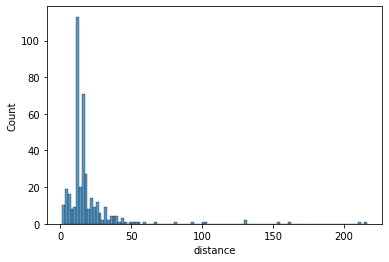

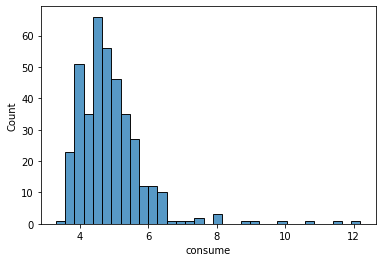

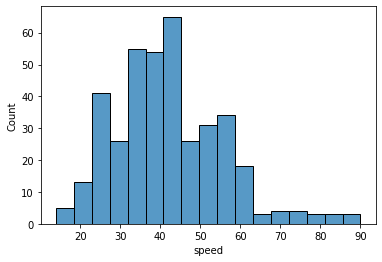

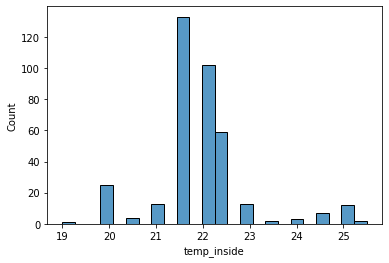

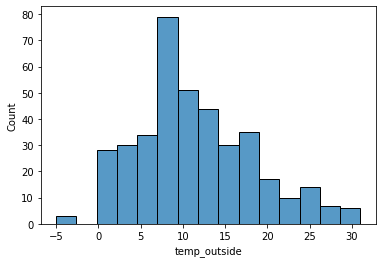

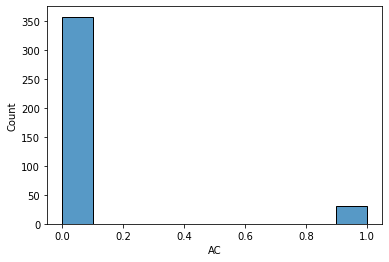

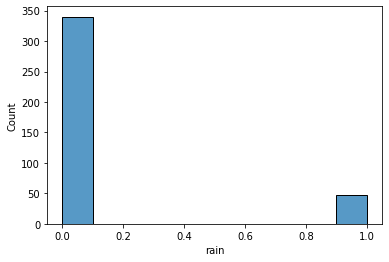

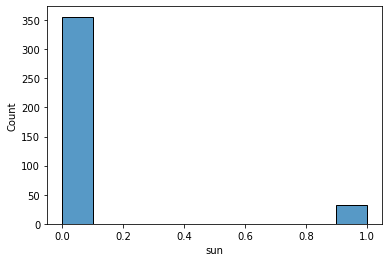

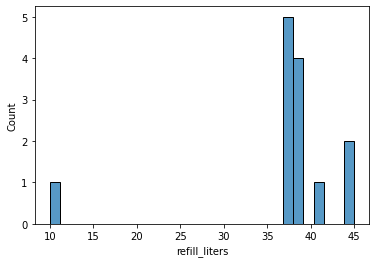

In [179]:
import matplotlib.pyplot as plt
def numeric(df):
    for i in df.columns:
        sns.histplot(x=i, data = df);
        plt.show()
    return
    
numeric(numericals1)



```
# checking outliers
```



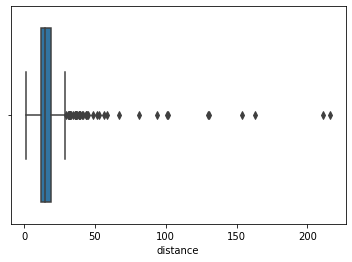

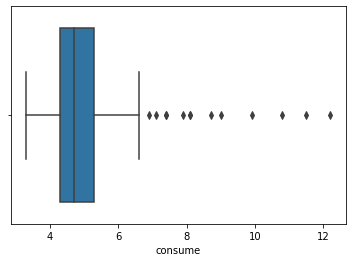

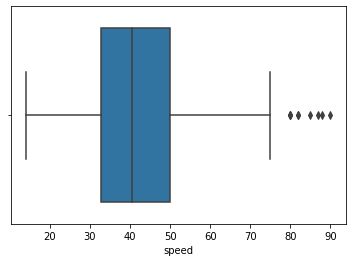

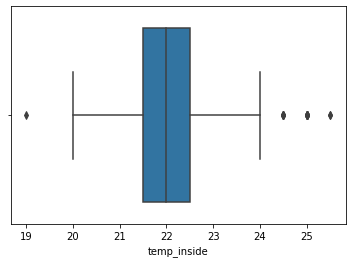

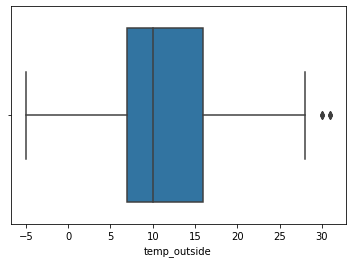

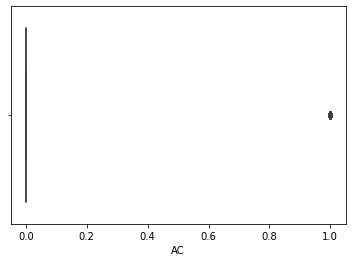

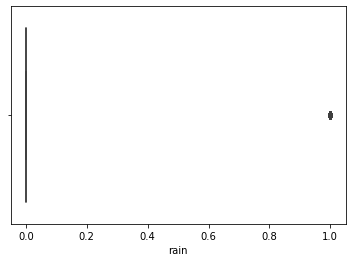

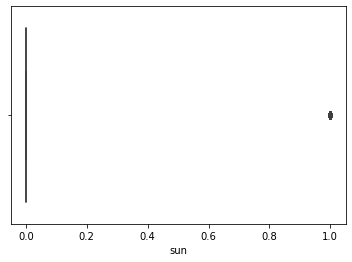

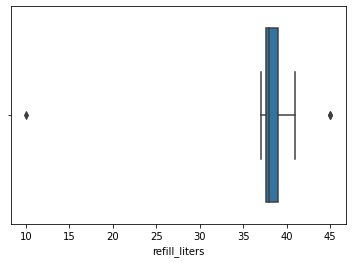

In [180]:
import matplotlib.pyplot as plt
def numeric_outliers(df):
    for i in df.columns:
        sns.boxplot(x=i, data = df);
        plt.show()
    return
    
numeric_outliers(numericals1)

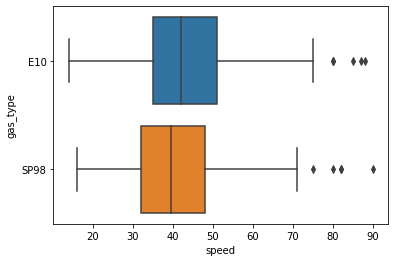

In [181]:
sns.boxplot(x="speed", y="gas_type", data=data)
plt.show()

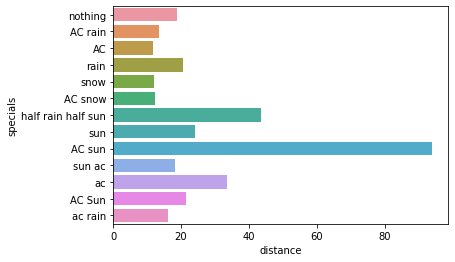

In [189]:
sns.barplot(x="distance", y="specials", data=data, ci=None)

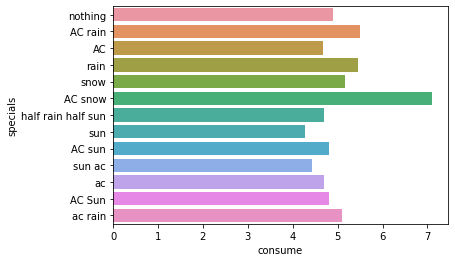

In [191]:
sns.barplot(x="consume", y="specials", data=data, ci=None)

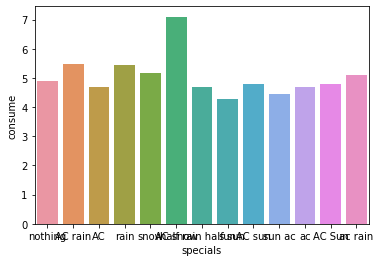

In [192]:
sns.barplot(x="specials", y="consume", data=data, ci=None)

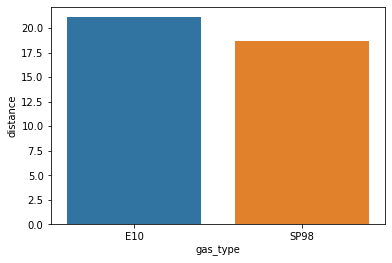

In [195]:
sns.barplot(x="gas_type", y="distance", data=data, ci=None)

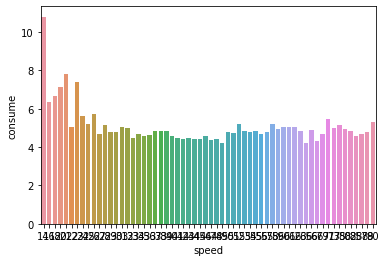

In [194]:
sns.barplot(x="gas_type", y="consume", data=data, ci=None)

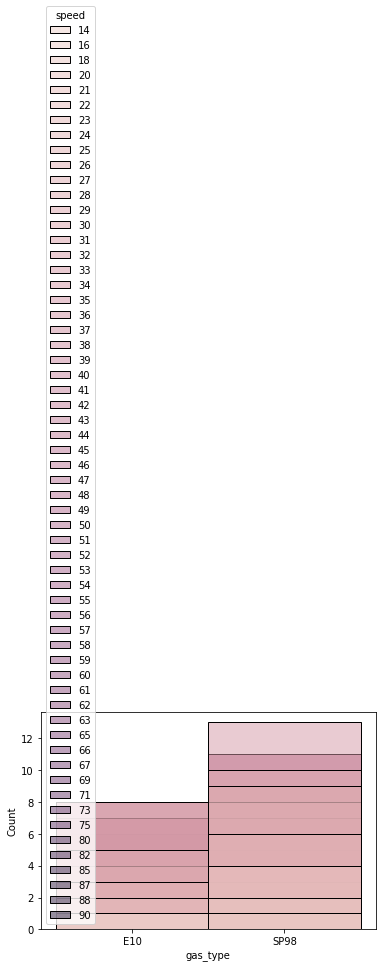

In [190]:
sns.histplot(x="gas_type", hue= "speed", data=data)
plt.show()

removing outliers from speed and temp outside

In [196]:
iqr = np.percentile(numericals1['speed'],75) - np.percentile(numericals1['speed'],25)
upper_limit = np.percentile(numericals1['speed'],75) + 1.5*iqr
lower_limit = np.percentile(numericals1['speed'],25) - 1.5*iqr

In [197]:
numeric_speed= numericals1[(numericals1['speed']>lower_limit) & (numericals1['speed']<upper_limit)]

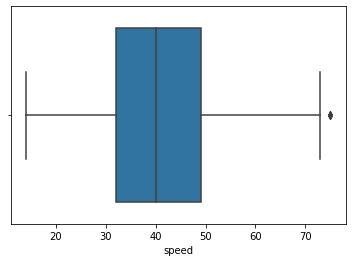

In [198]:
sns.boxplot(x=numeric_speed['speed'])
plt.show()

In [199]:
iqr = np.percentile(numericals1['temp_outside'],75) - np.percentile(numericals1['temp_outside'],25)
upper_limit = np.percentile(numericals1['temp_outside'],75) + 1.5*iqr
lower_limit = np.percentile(numericals1['temp_outside'],25) - 1.5*iqr

In [200]:
numeric_temp_outside= numericals1[(numericals1['temp_outside']>lower_limit) & (numericals1['temp_outside']<upper_limit)]

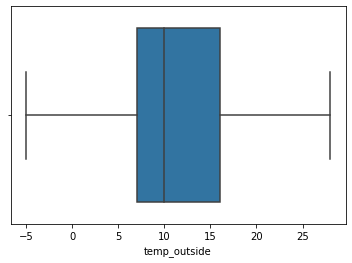

In [201]:
sns.boxplot(x=numeric_temp_outside['temp_outside'])
plt.show()

In [202]:
iqr = np.percentile(numericals1['distance'],75) - np.percentile(numericals1['distance'],25)
upper_limit = np.percentile(numericals1['distance'],75) + 1.5*iqr
lower_limit = np.percentile(numericals1['distance'],25) - 1.5*iqr

In [203]:
numeric_distance= numericals1[(numericals1['distance']>lower_limit) & (numericals1['distance']<upper_limit)]

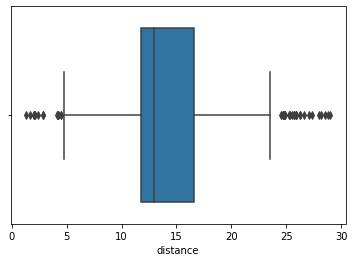

In [204]:
sns.boxplot(x=numeric_distance['distance'])
plt.show()

In [205]:
iqr = np.percentile(numericals1['consume'],75) - np.percentile(numericals1['consume'],25)
upper_limit = np.percentile(numericals1['consume'],75) + 1.5*iqr
lower_limit = np.percentile(numericals1['consume'],25) - 1.5*iqr

In [206]:
numeric_consume= numericals1[(numericals1['consume']>lower_limit) & (numericals1['consume']<upper_limit)]

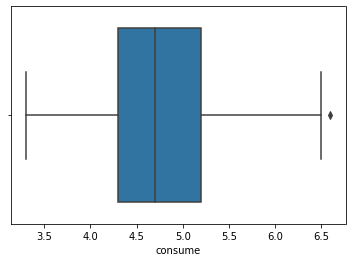

In [207]:
sns.boxplot(x=numeric_consume['consume'])
plt.show()

In [208]:
iqr = np.percentile(numericals1['temp_inside'],75) - np.percentile(numericals1['temp_inside'],25)
upper_limit = np.percentile(numericals1['temp_inside'],75) + 1.5*iqr
lower_limit = np.percentile(numericals1['temp_inside'],25) - 1.5*iqr

In [209]:
numeric_temp_inside= numericals1[(numericals1['temp_inside']>lower_limit) & (numericals1['temp_inside']<upper_limit)]

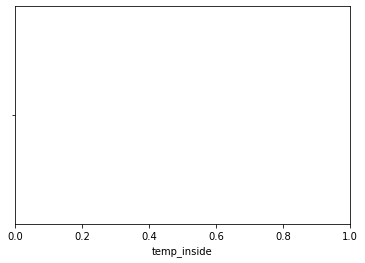

In [210]:
sns.boxplot(x=numeric_temp_inside['temp_inside'])
plt.show()

# ***Predictions***



```
first step checking the correlation```



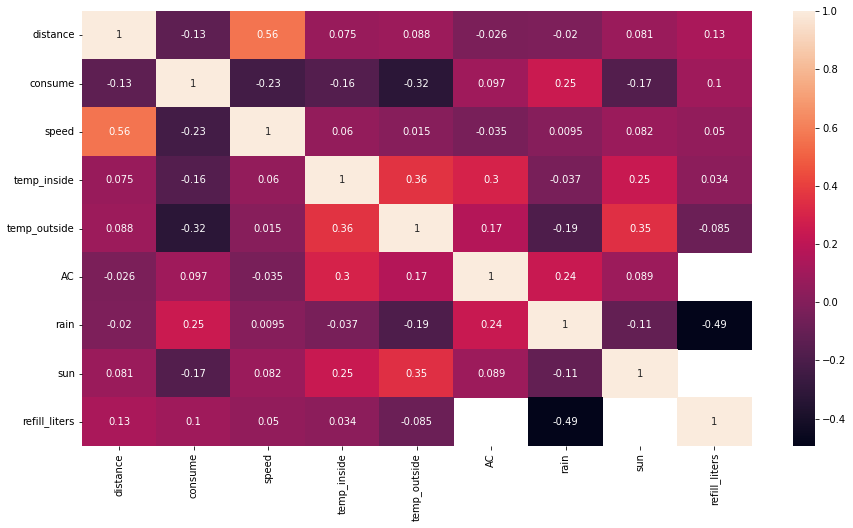

In [211]:
import seaborn as sb
dataplot=sb.heatmap(numericals1.corr(), annot=True,  )
plt.gcf().set_size_inches(15, 8)

as we can notice we haven't a problem of multiculinearity

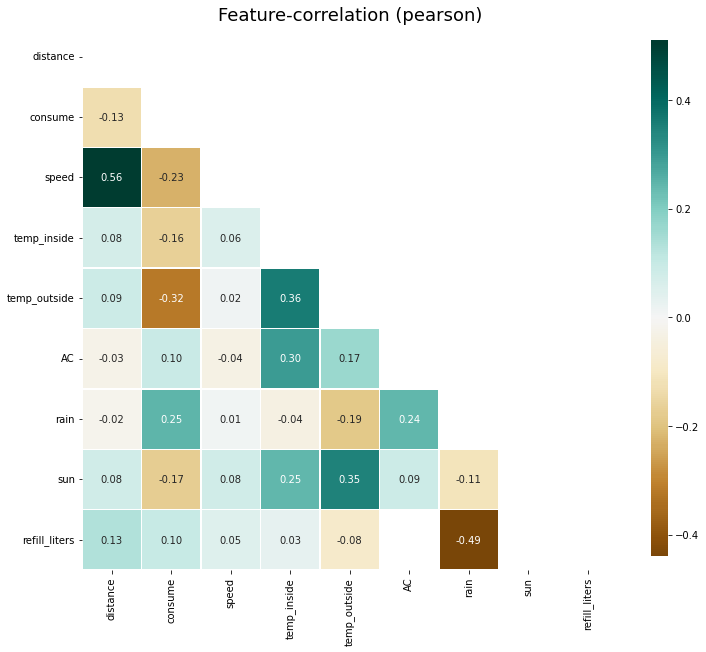

In [212]:
klib.corr_plot(numericals1)

it's the same but here we use the pearson correlation

In [213]:
data = data.astype(float)

ValueError: ignored

In [214]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
distance,388.0,19.652835,22.667837,1.3,11.80,14.6,19.0,216.1
consume,388.0,4.912371,1.033172,3.3,4.30,4.7,5.3,12.2
speed,388.0,41.927835,13.598524,14.0,32.75,40.5,50.0,90.0
temp_inside,376.0,21.929521,1.010455,19.0,21.50,22.0,22.5,25.5
temp_outside,388.0,11.358247,6.991542,-5.0,7.00,10.0,16.0,31.0
AC,388.0,0.077320,0.267443,0.0,0.00,0.0,0.0,1.0
rain,388.0,0.123711,0.329677,0.0,0.00,0.0,0.0,1.0
sun,388.0,0.082474,0.275441,0.0,0.00,0.0,0.0,1.0
refill_liters,13.0,37.115385,8.587282,10.0,37.60,38.0,39.0,45.0


In [215]:
sns.pairplot(numericals1)
plt.show()

KeyboardInterrupt: ignored

Error in callback <function flush_figures at 0x7effc5f11290> (for post_execute):


KeyboardInterrupt: ignored

 **Run the model** 

In [216]:
y = numericals1['distance']
X = numericals1.drop(columns='distance')

In [218]:

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1337)

*descriping the data*

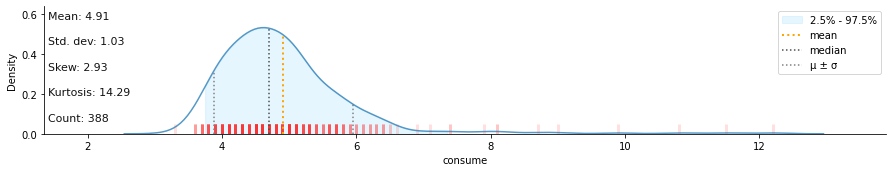

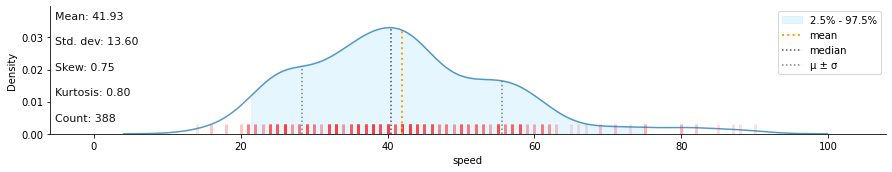

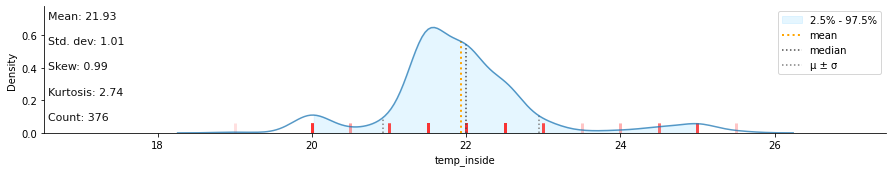

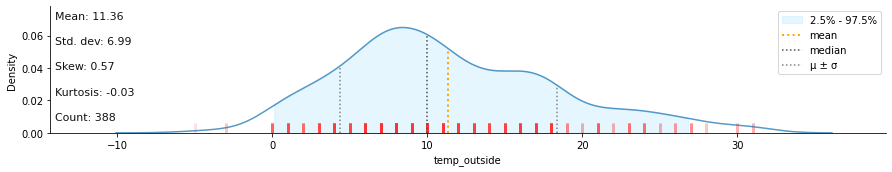

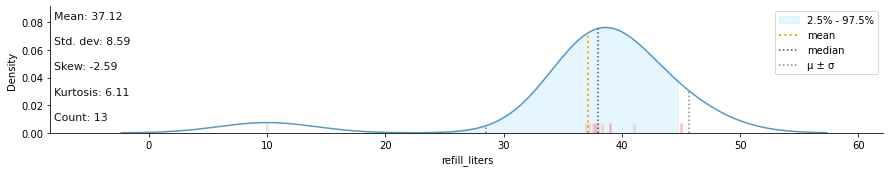

In [219]:
klib.dist_plot(X.select_dtypes(np.number), showall=True)

In [220]:
from sklearn.preprocessing import MinMaxScaler

MinMaxtransformer = MinMaxScaler()
MinMaxtransformer.fit(X_train)

X_train_minmax_scaled = MinMaxtransformer.transform(X_train)
X_test_minmax_scaled  = MinMaxtransformer.transform(X_test)

X_train_minmax_scaled_df = pd.DataFrame(X_train_minmax_scaled, columns=X_train.columns)
X_test_minmax_scaled_df  = pd.DataFrame(X_test_minmax_scaled, columns=X_test.columns)

**Running severals models**


**knn**


In [221]:
rmse_val = [] #to store rmse values for different k
knn_models = {}
for K in range(1,20):
    
    model_knn = neighbors.KNeighborsRegressor(n_neighbors = K)
    model_knn.fit(X_train, y_train)  #fit the model
    
    knn_models[K] = model_knn 
    pred=model_knn.predict(X_test) #make prediction on test set
    error = (r2_score(y_test,pred)) #calculate rmse
    rmse_val.append(error) #store rmse values
    print('r2_score value for k= ' , K , 'is:', error)

ValueError: ignored

In [ ]:
import sklearn
from sklearn import linear_model
sklearn.linear_model.LinearRegression
from sklearn.linear_model import LinearRegression

lm = LinearRegression()
lm.fit(X_train,y_train)

from sklearn.metrics import r2_score
y_pred_train_lm = lm.predict(X_train)
r2_score(y_train, y_pred_train_lm)